In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

# 回归模型
from sklearn.neighbors import KNeighborsRegressor

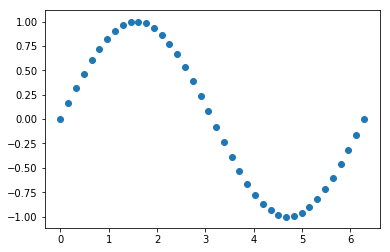

In [2]:
# 生成一组符合正弦分布的数据样本点，x就是样本，y样本标签
x = np.linspace(0,2*np.pi,40)
y = np.sin(x)
plt.scatter(x,y)

In [6]:
# 创建噪音数据，模拟真实环境
noise = np.random.random(size=20)*0.6-0.3

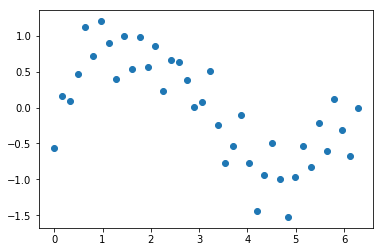

In [8]:
# 把噪音数据添加到样本标签中，查看包含噪声的数据分布情况
y[::2] += noise
plt.scatter(x,y)

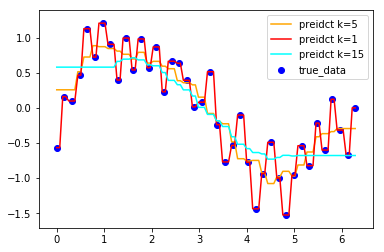

In [31]:
# 分别训练三种不同k值的knn回归器，预测结果，查看预测情况
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(x.reshape(-1,1),y)
knn2 = KNeighborsRegressor(n_neighbors=1)
knn2.fit(x.reshape(-1,1),y)
knn3 = KNeighborsRegressor(n_neighbors=15)
knn3.fit(x.reshape(-1,1),y)

X_test = np.linspace(x.min(),x.max(),100).reshape(-1,1)
y1_ = knn1.predict(X_test)
y2_ = knn2.predict(X_test)
y3_ = knn3.predict(X_test)

# 红色线属于过拟合 产生原因：对样本数据学习太完美，受到一些个体特影响
# 蓝色线属于欠拟合 产生原因：对数据样本学习不够详细，没有学习到普遍特征
# 黄色线属于最佳拟合，
plt.plot(X_test,y1_,label='preidct k=5',color='orange')
plt.plot(X_test,y2_,label='preidct k=1',color='red')
plt.plot(X_test,y3_,label='preidct k=15',color='cyan')
plt.scatter(x,y,label='true_data',color='blue')
plt.legend()